In [73]:
import pandas as pd
import numpy as np
%matplotlib inline

In [74]:
#Load data
cover = pd.read_csv('mapped_plant_quads_co_allrecords_cover.csv', keep_default_na=False, na_values=[""])
density = pd.read_csv('mapped_plant_quads_co_allrecords_density.csv', keep_default_na=False, na_values=[""])
climate = pd.read_csv('mapped_plant_quads_co_daily_climate.csv', keep_default_na=False, na_values=[""])
info = pd.read_csv('mapped_plant_quads_co_quad_info.csv', keep_default_na=False, na_values=[""])
inventory = pd.read_csv('mapped_plant_quads_co_quad_inventory.csv', keep_default_na=False, na_values=[""])
SRate = pd.read_csv('mapped_plant_quads_co_quad_stocking_rate.csv', keep_default_na=False, na_values=[""])
sp = pd.read_csv('mapped_plant_quads_co_species_list.csv', keep_default_na=False, na_values=[""])
snc = pd.read_csv('mapped_plant_quads_co_species_name_changes.csv', keep_default_na=False, na_values=[""])


Check data format of each:

In [75]:
cover.head()

,quad,year,species,area,x,y
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494


In [76]:
density.head()

,quad,year,species,x,y
0,gzgz_11,1997,Agropyron smithii,0.335793,0.041727
1,gzgz_11,1997,Agropyron smithii,0.707497,0.064662
2,gzgz_11,1997,Artemisia frigida,0.664633,0.295848
3,gzgz_11,1997,Unknown,0.909360,0.309185
4,gzgz_11,1997,Plantago patagonica,0.829952,0.320852


In [77]:
climate.head()

,year,month,day,meant,flag_meant,maxt,flag_maxt,mint,flag_mint,precip,flag_precip
0,1997,1,1,8.33,g,16.11,g,0.56,g,0.000,g
1,1997,1,2,8.89,g,14.44,g,3.33,g,0.000,g
2,1997,1,3,10.56,g,21.67,g,-0.56,g,0.254,g
3,1997,1,4,3.61,g,8.89,g,-1.67,g,0.000,g
4,1997,1,5,-4.44,g,3.89,g,-12.78,g,0.000,g


In [78]:
info.head()

,quadrat,pasture,latitude,longitude,elevation,before1997,from1997
0,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed
1,gzgz_19,19,40.823798,-104.710306,1633,grazed,grazed
2,gzgz_24,24,40.822824,-104.729504,1650,grazed,grazed
3,gzgz_5a,5a,40.868138,-104.690792,1657,grazed,grazed
4,gzgz_5b,5b,40.867662,-104.680630,1661,grazed,grazed


In [79]:
inventory.head()

,gzgz_11,gzgz_19,gzgz_24,gzgz_5a,gzgz_5b,gzgz_7,gzun_11,gzun_19,gzun_24,gzun_5a,...,ungz_24,ungz_5a,ungz_5b,ungz_7,unun_11,unun_19,unun_24,unun_5a,unun_5b,unun_7
0,1997,1997,1997,1997.0,1997.0,1997.0,1997,1997,1997.0,1997.0,...,1997.0,1997.0,1997,1997,1997.0,1997,1997.0,1997,1997.0,1997.0
1,1998,1998,1998,1998.0,1998.0,1998.0,1998,1998,1998.0,1998.0,...,1998.0,1998.0,1998,1998,1998.0,1998,1998.0,1998,1998.0,1998.0
2,1999,1999,1999,1999.0,1999.0,1999.0,1999,1999,1999.0,1999.0,...,1999.0,1999.0,1999,1999,1999.0,1999,1999.0,1999,1999.0,1999.0
3,2000,2000,2000,NaN,NaN,NaN,2000,2000,NaN,NaN,...,NaN,NaN,2000,2000,NaN,2000,NaN,2000,NaN,NaN
4,2001,2001,2001,2001.0,2001.0,2001.0,2001,2001,2001.0,2001.0,...,2001.0,2001.0,2001,2001,2001.0,2001,2001.0,2001,2001.0,2001.0


In [80]:
SRate.head()

,year,pasture,num_hd,date_in,date_out,asg,notes
0,1997.0,5b,26,8-May,23-Oct,296.5,yearling breeders
1,1997.0,5a,20,14-May,8-Oct,404.8,steers
2,1997.0,7,22,1-May,23-Oct,274.0,two year old breeders
3,1997.0,11,13,14-May,9-Oct,343.6,steers
4,1997.0,19,70,12-May,8-Oct,347.5,steers rotated in 7-160 acre pastures


In [81]:
sp.head()

,species,density,cover,growthform,longevity
0,Achillea millefolium,2.0,NaN,forb,P
1,Agropyron smithii,4649.0,NaN,grass,P
2,Allium spp.,18.0,NaN,forb,P
3,Allium textile,73.0,NaN,forb,P
4,Ambrosia psilostachya,2.0,NaN,forb,P


In [82]:
snc.head()

,old_name,new_name
0,Ant mound,Ant hill
1,Artemisia frigidae,Artemisia frigida
2,Astragulus missouriensis,Astragalus missouriensis
3,BOGR/BUDA mix,BOGR/BUDA
4,Bouteloua gracilils,Bouteloua gracilis


A plot of the area covered by each species over all quadrats (y) for each year (x). Area, species, quadrant and year are needed. All are present in variable "cover".

In [83]:
#group by species and year then total area
area_sp_yr=cover.groupby(['species','year'], as_index=False).area.sum() 
area_sp_yr.head() #check result

,species,year,area
0,Ant hill,1998,0.011008
1,Ant hill,1999,0.014806
2,Ant hill,2000,0.006458
3,Ant hill,2001,0.013366
4,Ant hill,2002,0.003034


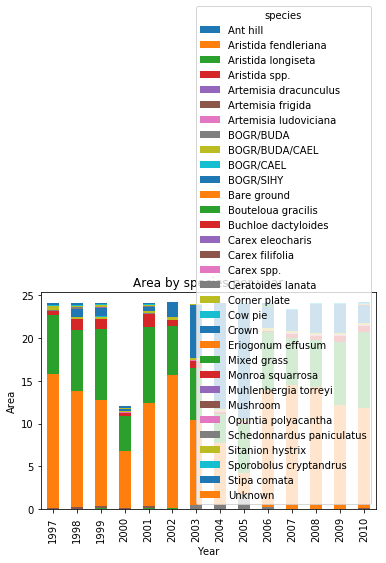

In [84]:
area_sp_yr_wide=area_sp_yr.pivot(index='year',columns='species',values='area') #pivot and plot data
my_plot=area_sp_yr_wide.plot(kind='bar', stacked=True, legend=True, title='Area by species per year')

my_plot.set_xlabel('Year') #set axis label
my_plot.set_ylabel('Area')

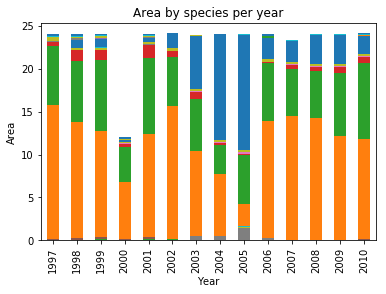

In [85]:
#and once more without the legend
area_sp_yr_wide=area_sp_yr.pivot(index='year',columns='species',values='area') #pivot and plot data
my_plot=area_sp_yr_wide.plot(kind='bar', stacked=True, legend=False, title='Area by species per year')

my_plot.set_xlabel('Year') #set axis label
my_plot.set_ylabel('Area')

A plot of the area covered by each growth-form over all quadrats (y) for each year (x). Same as above but growth form is needed instead of species so merge sp and cover.

In [86]:
#merge sp and cover
cover_sp =pd.merge(left =cover, right=sp, left_on='species', right_on='species', how='left')
cover_sp.head()

,quad,year,species,area,x,y,density,cover,growthform,longevity
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800,NaN,1299.0,Not plant,Not plant
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482,10.0,1988.0,Not plant,Not plant
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623,NaN,47497.0,grass,P
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770,NaN,47497.0,grass,P
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494,10.0,1988.0,Not plant,Not plant


In [87]:
#group by growthform and year then total area
area_gf_yr=cover_sp.groupby(['growthform','year'], as_index=False).area.sum() 
area_gf_yr.head() #check result

,growthform,year,area
0,Crown,1998,0.883835
1,Crown,1999,1.001064
2,Crown,2000,0.287084
3,Crown,2001,0.503875
4,Crown,2002,1.647143


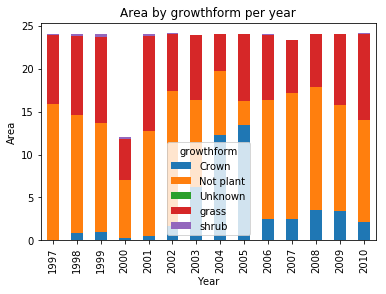

In [88]:
area_gf_yr_wide=area_gf_yr.pivot(index='year',columns='growthform',values='area') #pivot and plot data
my_plot2=area_gf_yr_wide.plot(kind='bar', stacked=True, legend=True, title='Area by growthform per year')

my_plot2.set_xlabel('Year') #set axis label
my_plot2.set_ylabel('Area')

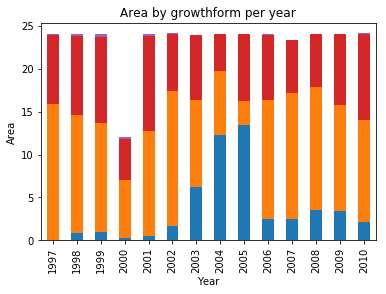

In [89]:
#and once more without the legend
area_gf_yr_wide=area_gf_yr.pivot(index='year',columns='growthform',values='area') #pivot and plot data
my_plot2=area_gf_yr_wide.plot(kind='bar', stacked=True, legend=False, title='Area by growthform per year')

my_plot2.set_xlabel('Year') #set axis label
my_plot2.set_ylabel('Area')

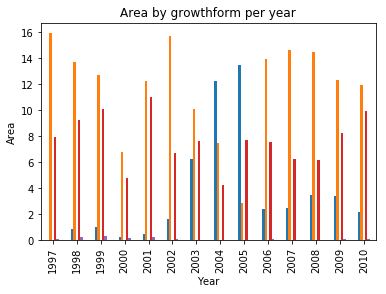

In [90]:
#and unstacked...
area_gf_yr_wide=area_gf_yr.pivot(index='year',columns='growthform',values='area') #pivot and plot data
my_plot2=area_gf_yr_wide.plot(kind='bar', stacked=False, legend=False, title='Area by growthform per year')

my_plot2.set_xlabel('Year') #set axis label
my_plot2.set_ylabel('Area')

A plot of the area covered by each growth-form over all quadrats (y) as a function of the mean precipitation for the year (x). 

In [91]:
#calculate mean precipitation for each year
mean_prec=climate.groupby('year', as_index=False).precip.mean() 
mean_prec.head()


,year,precip
0,1997,1.543701
1,1998,0.964534
2,1999,1.649775
3,2000,0.694447
4,2001,0.882880


In [92]:
#merge with cover_sp on year
merged =pd.merge(left =cover_sp, right=mean_prec, left_on='year', right_on='year', how='left')
merged.head()

,quad,year,species,area,x,y,density,cover,growthform,longevity,precip
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800,NaN,1299.0,Not plant,Not plant,1.543701
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482,10.0,1988.0,Not plant,Not plant,1.543701
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623,NaN,47497.0,grass,P,1.543701
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770,NaN,47497.0,grass,P,1.543701
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494,10.0,1988.0,Not plant,Not plant,1.543701


In [93]:
#group by growthform and precip then total area
merged_gf_prec=merged.groupby(['growthform','precip'], as_index=False).area.sum() 
merged_gf_prec.head() #check result

,growthform,precip,area
0,Crown,0.559414,1.647143
1,Crown,0.694447,0.287084
2,Crown,0.843191,12.285852
3,Crown,0.882880,0.503875
4,Crown,0.964534,0.883835


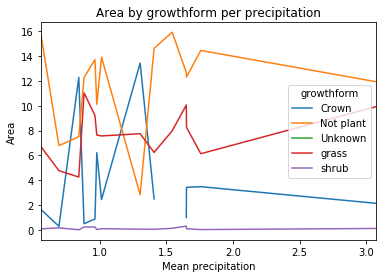

In [94]:
merged_gf_prec_wide=merged_gf_prec.pivot(index='precip',columns='growthform',values='area') #pivot and plot data
my_plot3=merged_gf_prec_wide.plot(kind='line', stacked=False, legend=True, title='Area by growthform per precipitation')

my_plot3.set_xlabel('Mean precipitation') #set axis label
my_plot3.set_ylabel('Area')

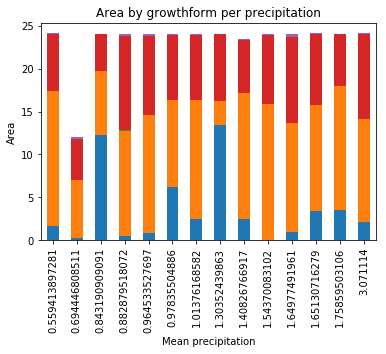

In [95]:
#again as a bar graph, same legend applies
merged_gf_prec_wide=merged_gf_prec.pivot(index='precip',columns='growthform',values='area') #pivot and plot data
my_plot4=merged_gf_prec_wide.plot(kind='bar', stacked=True, legend=False, title='Area by growthform per precipitation')

my_plot4.set_xlabel('Mean precipitation') #set axis label
my_plot4.set_ylabel('Area')

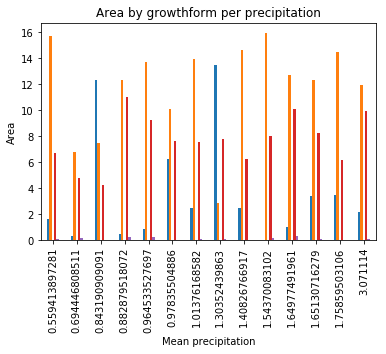

In [96]:
#unstacked...
merged_gf_prec_wide=merged_gf_prec.pivot(index='precip',columns='growthform',values='area') #pivot and plot data
my_plot4=merged_gf_prec_wide.plot(kind='bar', stacked=False, legend=False, title='Area by growthform per precipitation')

my_plot4.set_xlabel('Mean precipitation') #set axis label
my_plot4.set_ylabel('Area')

At least one additional plot investigating the relationship between plant composition (e.g. species or growth form) and another variable.



A plot of the area covered by each growth-form (y) as a function of elevation.

In [97]:
#merge with info on quad
final=pd.merge(left =merged, right=info, left_on='quad', right_on='quadrat', how='left')
final.head()

,quad,year,species,area,x,y,density,cover,growthform,longevity,precip,quadrat,pasture,latitude,longitude,elevation,before1997,from1997
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800,NaN,1299.0,Not plant,Not plant,1.543701,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482,10.0,1988.0,Not plant,Not plant,1.543701,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623,NaN,47497.0,grass,P,1.543701,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770,NaN,47497.0,grass,P,1.543701,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494,10.0,1988.0,Not plant,Not plant,1.543701,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed


In [98]:
#group by growthform and elevation then total area
gf_elev=final.groupby(['growthform','elevation'], as_index=False).area.sum() 
gf_elev.head() #check result

,growthform,elevation,area
0,Crown,1629,1.070674
1,Crown,1630,0.855076
2,Crown,1633,1.578567
3,Crown,1635,1.868877
4,Crown,1650,2.306404


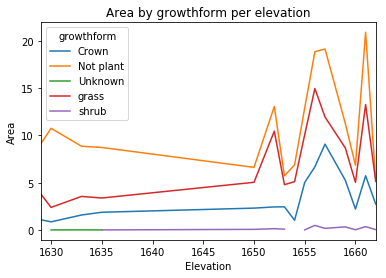

In [99]:
#pivot and plot data
gf_elev_wide=gf_elev.pivot(index='elevation',columns='growthform',values='area') 
my_plot5=gf_elev_wide.plot(kind='line', stacked=False, legend=True, title='Area by growthform per elevation')

my_plot5.set_xlabel('Elevation') #set axis label
my_plot5.set_ylabel('Area')

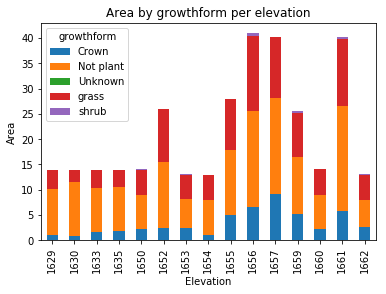

In [100]:
#again as a bar graph
gf_elev_wide=gf_elev.pivot(index='elevation',columns='growthform',values='area') 
my_plot6=gf_elev_wide.plot(kind='bar', stacked=True, legend=True, title='Area by growthform per elevation')

my_plot6.set_xlabel('Elevation') #set axis label
my_plot6.set_ylabel('Area')

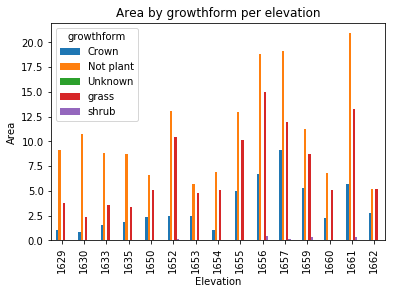

In [101]:
#unstacked
gf_elev_wide=gf_elev.pivot(index='elevation',columns='growthform',values='area') 
my_plot6=gf_elev_wide.plot(kind='bar', stacked=False, legend=True, title='Area by growthform per elevation')

my_plot6.set_xlabel('Elevation') #set axis label
my_plot6.set_ylabel('Area')